In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Carregando base de dados 
!git clone https://github.com/snitraMnolraM/Criando_Sistema_de_Reconhecimento_Facial_do_Zero.git

Cloning into 'Criando_Sistema_de_Reconhecimento_Facial_do_Zero'...
remote: Enumerating objects: 5811, done.
remote: Counting objects: 100% (1009/1009), done.
remote: Compressing objects: 100% (1000/1000), done.
remote: Total 5811 (delta 15), reused 981 (delta 9), pack-reused 4802
Receiving objects: 100% (5811/5811), 436.51 MiB | 37.88 MiB/s, done.
Resolving deltas: 100% (63/63), done.
Checking out files: 100% (5837/5837), done.


In [4]:
df = pd.read_csv('/content/Criando_Sistema_de_Reconhecimento_Facial_do_Zero/dataset/faces1.csv')

In [5]:
df.tail()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,119,120,121,122,123,124,125,126,127,target
3296,3296,2.214622,-0.892696,-0.025543,0.264256,1.027872,-0.080506,0.330456,0.101382,0.499247,...,1.105542,2.018212,-0.337148,0.122312,-0.843702,-1.610231,0.203335,-0.350950,-1.324591,Desconhecido
3297,3297,0.603437,-0.330001,-1.477440,-0.268367,-0.484546,-0.088676,-0.438667,-0.457203,0.870595,...,-1.049451,1.278901,-0.641879,-0.128639,0.984689,-0.782011,-0.681047,-0.074032,-0.425313,Desconhecido
3298,3298,-0.220303,0.037024,0.259256,0.941429,1.187605,-0.069720,0.156543,-0.039570,-0.056281,...,-1.640661,-0.386480,-0.517925,0.973711,-0.087621,-0.769330,-1.861863,0.122753,0.353206,Desconhecido
3299,3299,1.087479,0.755220,-1.560250,0.233360,-1.258553,2.079727,0.106518,0.019853,0.534495,...,-0.153888,-0.204704,0.093621,1.049766,0.505572,0.370888,-0.188503,0.079960,0.963694,Desconhecido
3300,3300,1.343130,-0.391064,-0.598514,-0.317617,0.304199,1.619131,-0.187500,-0.168437,0.123339,...,0.990499,0.683281,-0.035176,1.702495,-0.923036,-0.997819,-0.564307,0.513649,-0.563548,Desconhecido


In [6]:
df.columns.values

array(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75',
       '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86',
       '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97',
       '98', '99', '100', '101', '102', '103', '104', '105', '106', '107',
       '108', '109', '110', '111', '112', '113', '114', '115', '116',
       '117', '118', '119', '120', '121', '122', '123', '124', '125',
       '126', '127', 'target'], dtype=object)

In [7]:
df = df.drop("Unnamed: 0", axis=1)

In [8]:
X = np.array(df.drop("target", axis=1))

In [9]:
X.shape

(3301, 128)

In [10]:
X

array([[-0.8283192 ,  0.34726122, -0.10282408, ...,  2.060484  ,
         0.687899  , -0.25670514],
       [-1.3114648 ,  0.47376135,  1.1849747 , ...,  0.5106106 ,
         0.4788892 ,  0.7513056 ],
       [-0.9048784 ,  0.9108722 ,  1.4811327 , ...,  0.9618415 ,
         0.11153556,  1.0338509 ],
       ...,
       [-0.22030324,  0.03702389,  0.25925645, ..., -1.8618633 ,
         0.1227533 ,  0.35320583],
       [ 1.0874795 ,  0.7552204 , -1.5602505 , ..., -0.18850328,
         0.07995977,  0.9636937 ],
       [ 1.3431295 , -0.3910645 , -0.5985141 , ..., -0.56430745,
         0.5136494 , -0.5635481 ]])

In [11]:
y = np.array(df.target)

In [12]:
y.shape

(3301,)

### Misturando tudo 

In [13]:
from sklearn.utils import shuffle

In [14]:
trainX, trainY = shuffle(X, y, random_state=0)

In [15]:
trainY

array(['Gabigol', 'Santos', 'Joao_Gomes', ..., 'Everton_Ribeiro',
       'Arrascaeta', 'Desconhecido'], dtype=object)

###Tratando das Labels


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
out_encoder = LabelEncoder()

In [18]:
out_encoder.fit(trainY)

LabelEncoder()

In [19]:
trainY = out_encoder.transform(trainY)

In [20]:
trainY

array([ 5, 10,  6, ...,  3,  0,  2])

### Validation

In [21]:
df_val = pd.read_csv('/content/Criando_Sistema_de_Reconhecimento_Facial_do_Zero/dataset/faces_val1.csv')

In [22]:
df_val.columns.values

array(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75',
       '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86',
       '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97',
       '98', '99', '100', '101', '102', '103', '104', '105', '106', '107',
       '108', '109', '110', '111', '112', '113', '114', '115', '116',
       '117', '118', '119', '120', '121', '122', '123', '124', '125',
       '126', '127', 'target'], dtype=object)

In [23]:
df_val = df_val.drop("Unnamed: 0", axis=1)

In [24]:
valX = np.array(df_val.drop("target", axis=1))
valY = np.array(df_val.target)


In [25]:
out_encoder.fit(valY)

LabelEncoder()

In [26]:
valY = out_encoder.transform(valY) 

### **Avaliando algoritmos**

#####KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

In [29]:
knn.fit(trainX, trainY)

KNeighborsClassifier()

In [30]:
yhat_train = knn.predict(trainX)
yhat_val = knn.predict(valX)

In [31]:
yhat_val

array([10, 10, 10, 10, 10, 10, 10,  3, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
import seaborn as sns


In [33]:
def print_confusion_matrix(model_name, valY, yhat_val):

  cm = confusion_matrix(valY, yhat_val)
  total = sum(sum(cm))
  acc =  100*accuracy_score(valY, yhat_val)
  sensitivity = 100*metrics.recall_score(valY, yhat_val, average='macro')
  specificity = 100*metrics.recall_score(yhat_val, valY, average='macro', pos_label=1)

  print("MODELO: {}".format(model_name))
  print("Acurácia: {:.2f}%".format(acc))
  print("Sensitividade: {:.4f}%".format(sensitivity))
  print("Especificidade: {:.4f}%".format(specificity))
  
  
  

  from mlxtend.plotting import plot_confusion_matrix
  fig, ax = plot_confusion_matrix(conf_mat= cm , figsize= (5, 8))

  plt.tight_layout()
  plt.title("Confusion Matrix")
  plt.show()
  

MODELO: KNN
Acurácia: 94.07%
Sensitividade: 96.9833%
Especificidade: 92.8477%


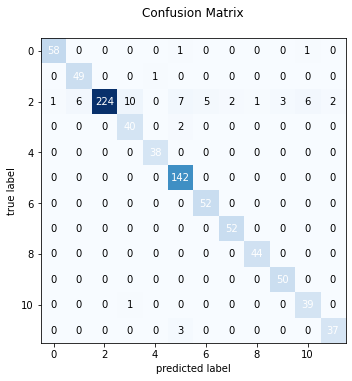

In [34]:
print_confusion_matrix("KNN", valY, yhat_val)

In [35]:
print(classification_report(valY, yhat_val))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        60
           1       0.89      0.98      0.93        50
           2       1.00      0.84      0.91       267
           3       0.78      0.95      0.86        42
           4       0.97      1.00      0.99        38
           5       0.92      1.00      0.96       142
           6       0.91      1.00      0.95        52
           7       0.96      1.00      0.98        52
           8       0.98      1.00      0.99        44
           9       0.94      1.00      0.97        50
          10       0.85      0.97      0.91        40
          11       0.95      0.93      0.94        40

    accuracy                           0.94       877
   macro avg       0.93      0.97      0.95       877
weighted avg       0.95      0.94      0.94       877



#### SVM

In [36]:
from sklearn import svm

In [37]:
svm = svm.SVC()

In [38]:
svm.fit(trainX, trainY)

SVC()

In [39]:
yhat_train = svm.predict(trainX)
yhat_val = svm.predict(valX)

MODELO: SVM
Acurácia: 98.63%
Sensitividade: 98.0638%
Especificidade: 99.3992%


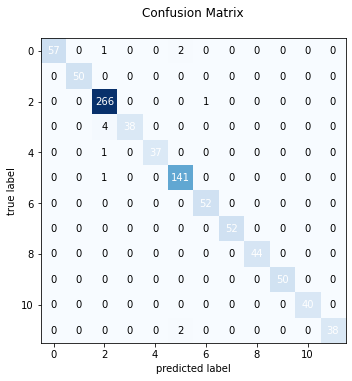

In [40]:
print_confusion_matrix("SVM", valY, yhat_val)

### Usando o Keras

In [41]:
from tensorflow.keras.utils import to_categorical

In [42]:
trainY = to_categorical(trainY)

In [43]:
valY = to_categorical(valY)


In [44]:
from tensorflow.keras import models, layers


In [48]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(128,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 12)                780       
                                                                 
Total params: 9,036
Trainable params: 9,036
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [52]:
model.fit(trainX, trainY, epochs=100, batch_size=4)

Epoch 1/100
826/826 [==============================] - 1s 2ms/step - loss: 0.0169 - accuracy: 0.9939
Epoch 2/100
826/826 [==============================] - 1s 2ms/step - loss: 0.0114 - accuracy: 0.9958
Epoch 3/100
826/826 [==============================] - 1s 2ms/step - loss: 0.0120 - accuracy: 0.9955
Epoch 4/100
826/826 [==============================] - 1s 2ms/step - loss: 0.0118 - accuracy: 0.9976
Epoch 5/100
826/826 [==============================] - 1s 2ms/step - loss: 0.0155 - accuracy: 0.9958
Epoch 6/100
826/826 [==============================] - 1s 2ms/step - loss: 0.0230 - accuracy: 0.9921
Epoch 7/100
826/826 [==============================] - 1s 2ms/step - loss: 0.0201 - accuracy: 0.9927
Epoch 8/100
826/826 [==============================] - 1s 2ms/step - loss: 0.0130 - accuracy: 0.9952
Epoch 9/100
826/826 [==============================] - 1s 2ms/step - loss: 0.0180 - accuracy: 0.9952
Epoch 10/100
826/826 [==============================] - 1s 2ms/step - loss: 0.0122 - accura

In [53]:
yhat_train = model.predict(trainX)
yhat_val = model.predict(valX)

In [54]:
# tirando as probilidades 
yhat_val = np.argmax(yhat_val, axis=1)
valY = np.argmax(valY, axis=1)


MODELO: KERAS
Acurácia: 97.61%
Sensitividade: 97.1132%
Especificidade: 98.9823%


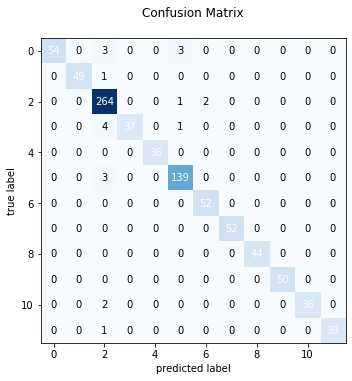

In [55]:
print_confusion_matrix("KERAS", valY, yhat_val)

In [56]:
model.save('faces1.h5')